In [1]:
from glotaran_tools.specification_parser import parse_yml
from glotaran_core.model import Dataset
from glotaran_models.kinetic import KineticSeparableModel
import numpy as np
from lmfit import Parameters
# Imports for plotting

import matplotlib.pyplot as plt
%matplotlib notebook

fitspec = '''
type: kinetic

parameter: {}

compartments: [s1, s2, s3]

megacomplexes:
    - label: mc1
      k_matrices: [k1]

k_matrices:
  - label: "k1"
    matrix: {{
      '("s1","s1")': 1,
      '("s2","s2")': 2,
      '("s3","s3")': 3,
}}

initial_concentrations: []

irf: []

datasets: 
  - label: dataset1
    type: spectral
    megacomplexes: [mc1]
    path: 'data/dataset1.ascii'

'''

In [2]:
test_parameter = [101e-4, 202e-5, 505e-6]
test_amps = [1,2,3]
times = np.asarray(np.arange(0, 1500, 1.5))
simparams = Parameters()
simparams.add("p1", 101e-3)
simparams.add("p2", 202e-4)
simparams.add("p3", 505e-5)

simparams.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr
p1     0.101     -inf      inf     None     True     None
p2    0.0202     -inf      inf     None     True     None
p3   0.00505     -inf      inf     None     True     None


In [3]:
model = parse_yml(fitspec.format(test_parameter))
print(model)

Modeltype: Kinetic

Parameter
---------

Index: 1 Initial Value: 0.0101 Label: None
Index: 2 Initial Value: 0.00202 Label: None
Index: 3 Initial Value: 0.000505 Label: None

Megacomplexes
-------------

Label: mc1
K-Matrices: ['k1']

Datasets
--------

Dataset 'dataset1'

	Dataset Scaling: None
	Initial Concentration: None
	Megacomplexes: ['mc1']

	Irf: None


K-Matrices
----------

Label: k1
Matrix:
[[2 0 0]
 [0 1 0]
 [0 0 3]]


IRFs
----




In [4]:
fitmodel = KineticSeparableModel(model)
fitmodel.get_initial_fitting_parameter().pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr
p1    0.0101     -inf      inf     None     True     None
p2   0.00202     -inf      inf     None     True     None
p3  0.000505     -inf      inf     None     True     None


<IPython.core.display.Javascript object>


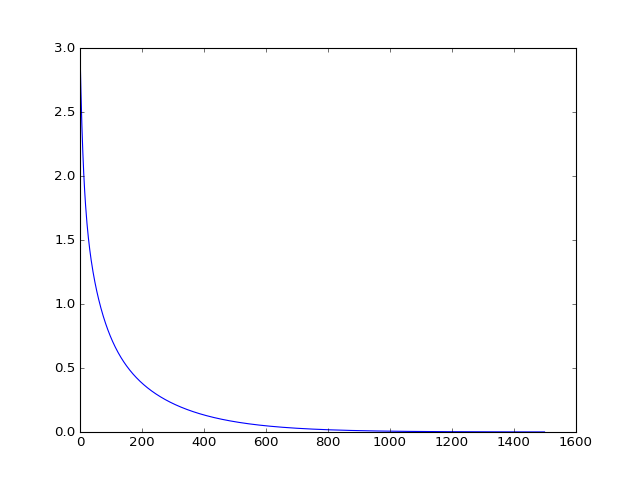

In [5]:
data = fitmodel.eval(simparams, *times, **{'dataset':'dataset1'})
fig = plt.figure()
plt.plot(times, data[:, 0])

In [6]:
result = fitmodel.fit(fitmodel.get_initial_fitting_parameter(), 
                      *times, 
                      **{"data": data}
                     )
result.params.pretty_print()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.9618e+00                                    3.37e+02    
       1              3         1.3170e+00      6.45e-01       2.58e-03       1.77e+02    
       2              4         8.5563e-01      4.61e-01       5.16e-03       9.93e+01    
       3              5         4.2961e-01      4.26e-01       1.03e-02       2.34e+02    
       4              6         1.2556e-01      3.04e-01       1.19e-02       9.07e+01    
       5              7         7.4509e-02      5.11e-02       7.54e-03       3.94e+00    
       6              8         6.2819e-02      1.17e-02       6.00e-03       2.56e+01    
       7             10         4.4607e-02      1.82e-02       1.76e-03       6.39e+00    
       8             11         3.9570e-02      5.04e-03       3.52e-03       1.88e+01    
       9             12         2.7290e-02      1.23e-02       3.52e-03       6.90e+00    

<IPython.core.display.Javascript object>


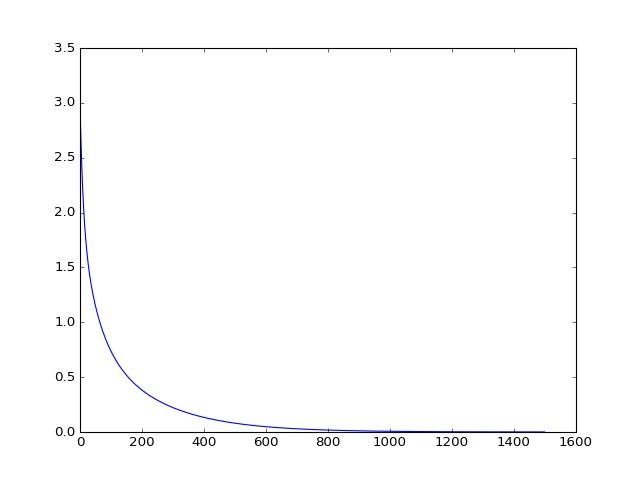

(1000, 1)
(1000, 1)


In [7]:
reconstructed_data = result.eval(*times, **{"data": data})
fig = plt.figure()
print(data.shape)
print(reconstructed_data.shape)
#plt.plot(times, data[:, 0])
plt.plot(times, reconstructed_data[:, 0])